The cell below is data scraped for injury status. The CSV includes the player's name and the injury status.

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date

injury_data = {'Name':['Jalen Johnson', 'Bogdan Bogdanovic','Jaylen Brown', 'Al Horford', 'Robert Williams III', 'Danilo Gallinari',
                'ALondes Williams', 'Ben Simmons', 'David Duke', 'Yuta Watanabe', 'T.J. Warren','Dennis Smith Jr.', 
                 'LaMelo Ball', 'Terry Rozier', 'Gordon Hayward', 'Cody Martin', 'Lonzo Ball', 'Lamar Stevens', 'Jarrett Allen', 
                 'Kevin Love', 'Dylan Windler', 'Ricky Rubio', 'Michael Porter Jr.','Nahshon Hyland', 'Jeff Green', 'Collin Gillespie',
                 'Marvin Bagley III', 'Bojan Bogdanovic', 'Isaiah Stewart','Jaden Ivey', 'Cade Cunningham', 'Andre Iguodala', 'JaeSean Tate',
                 'Chris Duarte', 'Daniel Theis', 'John Wall', 'Kawhi Leonard', 'Paul George', 'Luke Kennard', 'Cole Swider', 'Ziare Williams',
                 'Desmond Bane', 'Danny Green', 'Jimmy Butler', 'Haywood Highsmith', 'Victor Oladipo','Duncan Robinson', 'Omer Yurtseven',
                 'Serge Ibaka', 'Khris Middleton', 'Joe Ingles', 'Jaden McDaniels', 'Karl-Anthony Towns','Jordan McLaughlin', 'Taurean Prince',
                 'Brandon Ingram', 'Naji Marshall', 'CJ McCollum', 'Larry Nance Jr.', 'E.J. Liddell', 'Immanuel Quickley', 'Mike Muscala', 
                 'Chet Holmgren', 'Jalen Suggs', 'Chuma Okeke', 'Wendell Carter Jr.', 'Mo Bamba', 'Terrence Ross', 'Jonathan Issac', 'Jaden Springer', 
                 'Tyrese Maxey', 'James Harden', 'Chris Paul', 'Jae Crowder', 'Cameron Johnson', 'Keon Johnson', 'Damian Lillard','Gary Payton II',
                 'Chima Moneke', 'Trey Lyles', 'Josh Richardson', 'Keita Bates-Diop','Jakob Poeltl', 'Jeremy Sochan', 'Blake Wesley','Precious Achiuwa',
                 'Otto Porter Jr.', 'Leandro Bolmaro', 'Mike Conley', 'Johnny Juzang', 'Rudy Gay','Rui Hachimura', 'Delon Wright'],
                 'Injruy Status': ['Game Time Decision', 'Expected to be out until at least Dec 2', '	Game Time Decision', 'Game Time Decision','Expected to be out until at least Dec 25',
                 'Expected to be out until at least Apr 15', 'Game Time Decision', 'Game Time Decision', 'Game Time Decision', 'Game Time Decision', 'Expected to be out until at least Dec 2',
                 'Game Time Decision', 'Game Time Decision', 'Game Time Decision','Expected to be out until at least Jan 2', 'Expected to be out until at least Dec 26', 'Expected to be out until at least Jan 2',
                 'Game Time Decision', 'Game Time Decision', 'Game Time Decision', 'Expected to be out until at least Dec 14', 'Expected to be out until at least Dec 2', 'Game Time Decision','Game Time Decision',
                 'Expected to be out until at least Dec 2', 'Expected to be out until at least Dec 2', 'Game Time Decision', 'Game Time Decision','Game Time Decision','Game Time Decision',
                 'Expected to be out until at least Dec 14', 'Expected to be out until at least Dec 2', 'Game Time Decision', 'Expected to be out until at least Dec 9', 'Expected to be out until at least Jan 2', 
                 'Expected to be out until at least Nov 30', 'Expected to be out until at least Nov 30', 'Expected to be out until at least Dec 3','Expected to be out until at least Dec 3','Game Time Decision',
                 'Game Time Decision','Game Time Decision', 'Expected to be out until at least Apr 2','Game Time Decision', 'Game Time Decision','Game Time Decision','Game Time Decision', 'Expected to be out until at least Feb 24',
                 'Game Time Decision', 'Game Time Decision','Expected to be out until at least Jan 4','Game Time Decision', 'Game Time Decision','Game Time Decision', 'Expected to be out until at least Dec 3','Game Time Decision','Game Time Decision','Game Time Decision','Game Time Decision',
                 'Expected to be out until at least Apr 1','Game Time Decision','Expected to be out until at least Dec 7', 'Out for the season', 'Expected to be out until at least Dec 2','Expected to be out until at least Dec 2','Expected to be out until at least Dec 2',
                 'Game Time Decision', 'Game Time Decision', 'Expected to be out until at least Dec 2', 'Game Time Decision', 'Expected to be out until at least Dec 11', 'Expected to be out until at least Dec 5',
                 'Game Time Decision','Expected to be out until at least Dec 11', 'Expected to be out until at least Dec 11','Expected to be out until at least Nov 30','Expected to be out until at least Nov 30',
                 'Expected to be out until at least Dec 3', 'Game Time Decision', 'Game Time Decision','Game Time Decision', 'Game Time Decision', 'Game Time Decision', 'Game Time Decision', 'Expected to be out until at least Jan 1',
                 'Game Time Decision', 'Game Time Decision', 'Game Time Decision', 'Game Time Decision','Expected to be out until at least Dec 7', 'Expected to be out until at least Dec 2', 'Game Time Decision','Expected to be out until at least Dec 14']}



injury_df = pd.DataFrame(injury_data)

#CSV File with injury status and player name 
injury_csv = injury_df.to_csv(path_or_buf=None)


In [3]:
injury_df = injury_df.rename({'Injruy Status': 'Injury Status'}, axis=1)
injury_df

,Name,Injury Status
0,Jalen Johnson,Game Time Decision
1,Bogdan Bogdanovic,Expected to be out until at least Dec 2
2,Jaylen Brown,\tGame Time Decision
3,Al Horford,Game Time Decision
4,Robert Williams III,Expected to be out until at least Dec 25
...,...,...
88,Mike Conley,Game Time Decision
89,Johnny Juzang,Expected to be out until at least Dec 7
90,Rudy Gay,Expected to be out until at least Dec 2
91,Rui Hachimura,Game Time Decision


In [4]:
injury_df['Injury Status'].value_counts()

Game Time Decision                          51
Expected to be out until at least Dec 2     11
Expected to be out until at least Dec 3      4
Expected to be out until at least Nov 30     4
Expected to be out until at least Dec 14     3
Expected to be out until at least Dec 11     3
Expected to be out until at least Jan 2      3
Expected to be out until at least Dec 7      2
Expected to be out until at least Apr 15     1
Expected to be out until at least Dec 5      1
Expected to be out until at least Feb 24     1
\tGame Time Decision                         1
Expected to be out until at least Dec 9      1
Expected to be out until at least Dec 25     1
Expected to be out until at least Apr 1      1
Expected to be out until at least Jan 1      1
Expected to be out until at least Apr 2      1
Expected to be out until at least Dec 26     1
Out for the season                           1
Expected to be out until at least Jan 4      1
Name: Injury Status, dtype: int64

In [5]:
def diff_dates(date1, date2):
    return abs(date2-date1).days

def convert_dates(month, day):
    day = int(day)
    if month == "Nov":
        year = 2022
        month_num = 11
    if month == "Dec":
        year = 2022
        month_num = 12
    if month == "Jan":
        year = 2023
        month_num = 1
    if month == "Feb":
        year = 2023
        month_num = 2
    if month == "Mar":
        year = 2023
        month_num = 3
    if month == "Apr":
        year = 2023
        month_num = 4
    d1 = date(2022,12,1)
    d2 = date(year, month_num, day)
    result = diff_dates(d2, d1)
    avg_games_per_week = 3
    days_in_week = 7
    avg_games_missed = (result * avg_games_per_week) / days_in_week
    return avg_games_missed   


In [4]:
team2020 = pd.read_csv("2020-2021 Team Stats.csv") 
team2021= pd.read_csv("2021-2022 Team Stats.csv") 
team2022 = pd.read_csv("2022-2023 Team Stats.csv") 
player2019 = pd.read_csv("2019-2020 Player Stats.csv") 
player2020 = pd.read_csv("2020-2021 Player Stats.csv") 
player2021 = pd.read_csv("2021-2022 Player Stats.csv") 
player2022 = pd.read_csv("2022-2023 Player Stats.csv") 
player2022

#GP: Game

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,1,Precious Achiuwa,C,23,TOR,12,245,13.9,0.493,0.304,...,0.1,0.3,0.3,0.065,NaN,-2.0,-1.8,-3.8,-0.1,achiupr01
1,2,Steven Adams,C,29,MEM,21,568,16.4,0.549,0.008,...,0.4,0.8,1.2,0.102,NaN,-1.1,0.2,-0.9,0.2,adamsst01
2,3,Bam Adebayo,C,25,MIA,21,734,19.3,0.593,0.028,...,0.8,1.0,1.9,0.123,NaN,-0.1,0.8,0.7,0.5,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,8,72,9.1,0.519,0.333,...,0.1,0.0,0.1,0.068,NaN,-3.6,-2.6,-6.2,-0.1,agbajoc01
4,5,Santi Aldama,PF,22,MEM,21,530,14.1,0.554,0.479,...,0.7,0.7,1.4,0.128,NaN,-0.6,1.1,0.5,0.3,aldamsa01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,475,Delon Wright,PG,30,WAS,4,91,16.7,0.496,0.500,...,0.0,0.2,0.2,0.122,NaN,0.4,6.3,6.7,0.2,wrighde01
475,476,McKinley Wright IV,PG,24,DAL,1,5,25.9,0.250,0.250,...,0.0,0.0,0.0,0.032,NaN,-0.8,7.0,6.3,0.0,wrighmc01
476,477,Thaddeus Young,PF,34,TOR,19,329,16.3,0.578,0.157,...,0.5,0.4,1.0,0.142,NaN,-0.2,1.7,1.5,0.3,youngth01
477,478,Trae Young,PG,24,ATL,21,745,22.4,0.545,0.339,...,1.6,0.5,2.1,0.135,NaN,5.9,-2.0,3.9,1.1,youngtr01


In [7]:
def pre_process(injury_df):
    print(injury_df)
    strings = injury_df['Injury Status'].tolist()
    players = injury_df['Player'].tolist()

    active_2022_players = player2022['Player'].tolist()
    

    #print(active_players_teams)
    # print(players)
    # print(strings)
    # print(active_games_played)
    # print(active_players_teams)
    games_missed = []
    for i in range(len(strings)): 
        lst = strings[i].split(" ")
        #print(lst)
        if strings[i] == "Out for the season":
            missed_games = 82
            games_missed.append(missed_days)
            continue
        else:
            # For game time decision: see how many games the player has played
            # See difference from how many games their team has played
            # Add 2/3 to this to account for game time decision
            # That is total games missed if they are game time decision
            total_missed = 0
            player = players[i]
            if lst[-1] == "Decision":
                # If the player has played some games but has missed some games
                if (player in active_2022_players):
                    a = player2022[player2022['Player'] == player]['Tm']
                    player_team = a.values[0]

                    a = player2022[player2022['Player'] == player]['G']
                    player_games_played = a.values[0]

                    my_series = team2022[team2022['Short Form'] == player_team]['GP']
                    #print(players[i])
                    team_games = my_series.values
                    #print(team_games)
                    total_missed = team_games - player_games_played

                    #print(players[i], player_team, my_series, team_games, total_missed)
                else:                    
                    # Players has missed all games of the season
                    a = player2022[player2022['Player'] == player]['Tm']
                    player_team = a.values[0]

                    my_series = team2022[team2022['Short Form'] == player_team]['GP']

                    total_missed = my_series.values
                    #print(total_missed)

                    print(players[i], player_team, my_series, total_missed)
                total_missed += 2
                
                                
            # If they have an at least clause, then check to see how many games
            # They missed so far (similar to game time decision), add the number of games
            # they will miss + 4 for game time decision
            elif lst[-3] == 'least':
                date = lst[-2] + " " + lst[-1]
                month = lst[-2] 
                day = lst[-1]
                missed_games = convert_dates(month, day)
                total_missed += missed_games
                if (player in active_2022_players):
                    a = player2022[player2022['Player'] == player]['Tm']
                    player_team = a.values[0]

                    a = player2022[player2022['Player'] == player]['G']
                    player_games_played = a.values[0]

                    my_series = team2022[team2022['Short Form'] == player_team]['GP']
                    #print(my_series)
                    team_games = my_series.values
                    #print(team_games)
                    total_missed += (team_games - player_games_played)

                    #print(players[i], player_team, my_series, team_games, total_missed)
                else:                    
                    a = player2022[player2022['Player'] == player]['Tm']
                    player_team = a.values[0]

                    my_series = team2022[team2022['Short Form'] == player_team]['GP']
                    team_games = my_series.values
                    #print(team_games)
                    total_missed += team_games

                    #print(players[i], player_team, my_series, team_games, total_missed)



                total_missed += 4
            games_missed.extend(total_missed)
            

    return games_missed      

full_df = injury_df.merge(player2022, left_on='Name', right_on='Player')
games_missed = pre_process(full_df)
full_df['Games Missed'] = games_missed
full_df

               Name                             Injury Status   Rk  \
0     Jalen Johnson                        Game Time Decision  222   
1      Jaylen Brown                      \tGame Time Decision   62   
2        Al Horford                        Game Time Decision  201   
3       Ben Simmons                        Game Time Decision  400   
4     Yuta Watanabe                        Game Time Decision  453   
..              ...                                       ...  ...   
63  Leandro Bolmaro                        Game Time Decision   48   
64      Mike Conley                        Game Time Decision   92   
65         Rudy Gay   Expected to be out until at least Dec 2  148   
66    Rui Hachimura                        Game Time Decision  170   
67     Delon Wright  Expected to be out until at least Dec 14  475   

             Player Pos  Age   Tm   G   MP   PER  ...  OWS  DWS   WS  WS/48  \
0     Jalen Johnson  SF   21  ATL  21  299  12.3  ...  0.1  0.5  0.6  0.094   
1

,Name,Injury Status,Rk,Player,Pos,Age,Tm,G,MP,PER,...,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Games Missed
0,Jalen Johnson,Game Time Decision,222,Jalen Johnson,SF,21,ATL,21,299,12.3,...,0.5,0.6,0.094,NaN,-2.5,2.1,-0.5,0.1,johnsja05,3.000000
1,Jaylen Brown,\tGame Time Decision,62,Jaylen Brown,SF,26,BOS,21,746,20.0,...,0.7,1.7,0.107,NaN,1.9,-1.2,0.8,0.5,brownja02,3.000000
2,Al Horford,Game Time Decision,201,Al Horford,C,36,BOS,19,599,14.6,...,0.6,1.9,0.150,NaN,2.9,0.9,3.8,0.9,horfoal01,5.000000
3,Ben Simmons,Game Time Decision,400,Ben Simmons,PG,26,BRK,17,477,14.9,...,0.7,1.3,0.129,NaN,-1.6,2.2,0.6,0.3,simmobe01,8.000000
4,Yuta Watanabe,Game Time Decision,453,Yuta Watanabe,SF,28,BRK,14,255,17.7,...,0.2,1.0,0.181,NaN,3.9,-0.8,3.2,0.3,watanyu01,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Leandro Bolmaro,Game Time Decision,48,Leandro Bolmaro,SG,22,UTA,4,23,0.6,...,0.0,-0.1,-0.156,NaN,-10.2,-0.4,-10.6,-0.1,bolmale01,22.000000
64,Mike Conley,Game Time Decision,92,Mike Conley,PG,35,UTA,17,497,14.8,...,0.3,1.4,0.135,NaN,1.3,0.0,1.3,0.4,conlemi01,9.000000
65,Rudy Gay,Expected to be out until at least Dec 2,148,Rudy Gay,SF,36,UTA,12,189,6.9,...,0.2,0.0,-0.007,NaN,-4.4,0.4,-4.0,-0.1,gayru01,16.428571
66,Rui Hachimura,Game Time Decision,170,Rui Hachimura,PF,24,WAS,16,376,13.0,...,0.3,0.2,0.028,NaN,-1.8,-1.5,-3.3,-0.1,hachiru01,8.000000


In [8]:
11#full_df = injury_df.merge(player2022, left_on='Name', right_on='Player')
full_df


,Name,Injury Status,Rk,Player,Pos,Age,Tm,G,MP,PER,...,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Games Missed
0,Jalen Johnson,Game Time Decision,222,Jalen Johnson,SF,21,ATL,21,299,12.3,...,0.5,0.6,0.094,NaN,-2.5,2.1,-0.5,0.1,johnsja05,3.000000
1,Jaylen Brown,\tGame Time Decision,62,Jaylen Brown,SF,26,BOS,21,746,20.0,...,0.7,1.7,0.107,NaN,1.9,-1.2,0.8,0.5,brownja02,3.000000
2,Al Horford,Game Time Decision,201,Al Horford,C,36,BOS,19,599,14.6,...,0.6,1.9,0.150,NaN,2.9,0.9,3.8,0.9,horfoal01,5.000000
3,Ben Simmons,Game Time Decision,400,Ben Simmons,PG,26,BRK,17,477,14.9,...,0.7,1.3,0.129,NaN,-1.6,2.2,0.6,0.3,simmobe01,8.000000
4,Yuta Watanabe,Game Time Decision,453,Yuta Watanabe,SF,28,BRK,14,255,17.7,...,0.2,1.0,0.181,NaN,3.9,-0.8,3.2,0.3,watanyu01,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Leandro Bolmaro,Game Time Decision,48,Leandro Bolmaro,SG,22,UTA,4,23,0.6,...,0.0,-0.1,-0.156,NaN,-10.2,-0.4,-10.6,-0.1,bolmale01,22.000000
64,Mike Conley,Game Time Decision,92,Mike Conley,PG,35,UTA,17,497,14.8,...,0.3,1.4,0.135,NaN,1.3,0.0,1.3,0.4,conlemi01,9.000000
65,Rudy Gay,Expected to be out until at least Dec 2,148,Rudy Gay,SF,36,UTA,12,189,6.9,...,0.2,0.0,-0.007,NaN,-4.4,0.4,-4.0,-0.1,gayru01,16.428571
66,Rui Hachimura,Game Time Decision,170,Rui Hachimura,PF,24,WAS,16,376,13.0,...,0.3,0.2,0.028,NaN,-1.8,-1.5,-3.3,-0.1,hachiru01,8.000000


In [9]:
team2022

,RK,TEAM,Short Form,GP,PTS,FGM,FGA,FG%,3:00 PM,3PA,...,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF
0,1,Boston Celtics,BOS,22,121.9,43.1,86.5,49.8,17.0,41.6,...,22.0,85.3,8.0,33.6,41.6,27.5,5.9,5.1,12.9,20.6
1,2,Sacramento Kings,SAC,20,119.9,43.2,87.5,49.3,13.7,37.4,...,24.9,79.9,8.2,33.7,41.9,27.9,7.1,3.3,14.8,21.1
2,3,Golden State Warriors,GSW,22,117.5,43.1,89.3,48.2,16.1,42.9,...,18.9,80.5,9.1,33.5,42.6,29.7,7.3,4.0,16.5,23.0
3,4,New Orleans Pelicans,NOP,21,117.1,43.5,89.5,48.6,11.5,30.4,...,23.6,78.6,11.6,33.6,45.2,27.1,8.8,4.4,14.5,19.6
4,5,Utah Jazz,UTA,24,117.0,42.8,90.0,47.5,14.7,39.5,...,21.8,77.2,12.1,31.9,44.0,27.3,7.3,5.0,15.1,21.3
5,6,Oklahoma City Thunder,OKC,22,116.0,43.8,94.8,46.2,11.5,34.4,...,21.6,78.3,12.1,32.6,44.7,24.1,8.0,6.0,13.3,22.0
6,7,Phoenix Suns,PHO,21,115.8,43.3,90.8,47.7,12.3,32.9,...,20.6,81.5,11.7,31.8,43.5,27.0,7.4,5.9,12.8,21.8
7,8,Indiana Pacers,IND,21,115.6,40.9,90.8,45.0,14.6,40.8,...,24.3,79.5,10.9,32.8,43.7,28.0,8.0,6.5,14.9,21.6
8,9,Denver Nuggets,DEN,21,115.4,43.2,86.7,49.8,12.5,30.9,...,22.0,75.5,10.5,33.1,43.6,28.0,7.1,4.4,14.3,19.7
9,10,New York Knicks,NYK,22,115.2,42.3,92.7,45.6,11.0,34.4,...,24.8,79.6,12.9,33.6,46.5,24.0,7.0,4.7,12.8,22.3


### Decision Tree Classifier 

In [10]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.model_selection import train_test_split


In [189]:
wins_array=[]
wins_array2=[]
for i in team2020['Overall']:
    win= i.split('-')[0]
    #print(win)
    wins_array.append(win)
for i in team2021['Overall']:
    win= i.split('-')[0]
    #print(win)
    wins_array2.append(win)



In [194]:
wins_array2

['64',
 '56',
 '53',
 '53',
 '52',
 '51',
 '51',
 '51',
 '49',
 '48',
 '48',
 '46',
 '46',
 '44',
 '44',
 '43',
 '43',
 '42',
 '37',
 '36',
 '35',
 '34',
 '33',
 '30',
 '27',
 '25',
 '24',
 '23',
 '22',
 '20']

In [12]:

team2022['won']= wins_array
dummy_team2022= pd.get_dummies(team2022, columns=['TEAM', 'Short Form'])
y = dummy_team2022['won'] # make a won column 
X = dummy_team2022.drop(['won'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=88,)
X_train.shape, X_test.shape

((21, 80), (9, 80))

In [ ]:
full_df.head()

,Name,Injury Status,Rk,Player,Pos,Age,Tm,G,MP,PER,...,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Games Missed
0,Jalen Johnson,Game Time Decision,222,Jalen Johnson,SF,21,ATL,21,299,12.3,...,0.5,0.6,0.094,NaN,-2.5,2.1,-0.5,0.1,johnsja05,[3]
1,Jaylen Brown,\tGame Time Decision,62,Jaylen Brown,SF,26,BOS,21,746,20.0,...,0.7,1.7,0.107,NaN,1.9,-1.2,0.8,0.5,brownja02,[3]
2,Al Horford,Game Time Decision,201,Al Horford,C,36,BOS,19,599,14.6,...,0.6,1.9,0.150,NaN,2.9,0.9,3.8,0.9,horfoal01,[5]
3,Ben Simmons,Game Time Decision,400,Ben Simmons,PG,26,BRK,17,477,14.9,...,0.7,1.3,0.129,NaN,-1.6,2.2,0.6,0.3,simmobe01,[8]
4,Yuta Watanabe,Game Time Decision,453,Yuta Watanabe,SF,28,BRK,14,255,17.7,...,0.2,1.0,0.181,NaN,3.9,-0.8,3.2,0.3,watanyu01,[11]


In [ ]:
full_df.groupby(['Tm', 'Name'])
full_df

,Name,Injury Status,Rk,Player,Pos,Age,Tm,G,MP,PER,...,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Games Missed
0,Jalen Johnson,Game Time Decision,222,Jalen Johnson,SF,21,ATL,21,299,12.3,...,0.5,0.6,0.094,NaN,-2.5,2.1,-0.5,0.1,johnsja05,[3]
1,Jaylen Brown,\tGame Time Decision,62,Jaylen Brown,SF,26,BOS,21,746,20.0,...,0.7,1.7,0.107,NaN,1.9,-1.2,0.8,0.5,brownja02,[3]
2,Al Horford,Game Time Decision,201,Al Horford,C,36,BOS,19,599,14.6,...,0.6,1.9,0.150,NaN,2.9,0.9,3.8,0.9,horfoal01,[5]
3,Ben Simmons,Game Time Decision,400,Ben Simmons,PG,26,BRK,17,477,14.9,...,0.7,1.3,0.129,NaN,-1.6,2.2,0.6,0.3,simmobe01,[8]
4,Yuta Watanabe,Game Time Decision,453,Yuta Watanabe,SF,28,BRK,14,255,17.7,...,0.2,1.0,0.181,NaN,3.9,-0.8,3.2,0.3,watanyu01,[11]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Leandro Bolmaro,Game Time Decision,48,Leandro Bolmaro,SG,22,UTA,4,23,0.6,...,0.0,-0.1,-0.156,NaN,-10.2,-0.4,-10.6,-0.1,bolmale01,[22]
64,Mike Conley,Game Time Decision,92,Mike Conley,PG,35,UTA,17,497,14.8,...,0.3,1.4,0.135,NaN,1.3,0.0,1.3,0.4,conlemi01,[9]
65,Rudy Gay,Expected to be out until at least Dec 2,148,Rudy Gay,SF,36,UTA,12,189,6.9,...,0.2,0.0,-0.007,NaN,-4.4,0.4,-4.0,-0.1,gayru01,[16.42857142857143]
66,Rui Hachimura,Game Time Decision,170,Rui Hachimura,PF,24,WAS,16,376,13.0,...,0.3,0.2,0.028,NaN,-1.8,-1.5,-3.3,-0.1,hachiru01,[8]


In [ ]:
full_df.groupby(['Tm', 'Name']).count().reset_index()

,Tm,Name,Injury Status,Rk,Player,Pos,Age,G,MP,PER,...,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Games Missed
0,ATL,Jalen Johnson,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
1,BOS,Al Horford,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
2,BOS,Jaylen Brown,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
3,BRK,Ben Simmons,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
4,BRK,T.J. Warren,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,UTA,Leandro Bolmaro,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
64,UTA,Mike Conley,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
65,UTA,Rudy Gay,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
66,WAS,Delon Wright,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1


In [ ]:
full_df.groupby(['Tm']).agg(lambda x: list(x))

,Name,Injury Status,Rk,Player,Pos,Age,G,MP,PER,TS%,...,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Games Missed
Tm,,,,,,,,,,,,,,,,,,,,,
ATL,[Jalen Johnson],[Game Time Decision],[222],[Jalen Johnson],[SF],[21],[21],[299],[12.3],[0.529],...,[0.5],[0.6],[0.094],[nan],[-2.5],[2.1],[-0.5],[0.1],[johnsja05],[3.0]
BOS,"[Jaylen Brown, Al Horford]","[\tGame Time Decision, Game Time Decision]","[62, 201]","[Jaylen Brown, Al Horford]","[SF, C]","[26, 36]","[21, 19]","[746, 599]","[20.0, 14.6]","[0.61, 0.691]",...,"[0.7, 0.6]","[1.7, 1.9]","[0.107, 0.15]","[nan, nan]","[1.9, 2.9]","[-1.2, 0.9]","[0.8, 3.8]","[0.5, 0.9]","[brownja02, horfoal01]","[3.0, 5.0]"
BRK,"[Ben Simmons, Yuta Watanabe, T.J. Warren]","[Game Time Decision, Game Time Decision, Expec...","[400, 453, 449]","[Ben Simmons, Yuta Watanabe, T.J. Warren]","[PG, SF, SF]","[26, 28, 29]","[17, 14, 1]","[477, 255, 17]","[14.9, 17.7, 14.2]","[0.615, 0.781, 0.455]",...,"[0.7, 0.2, 0.0]","[1.3, 1.0, 0.0]","[0.129, 0.181, -0.043]","[nan, nan, nan]","[-1.6, 3.9, -3.6]","[2.2, -0.8, -3.5]","[0.6, 3.2, -7.1]","[0.3, 0.3, 0.0]","[simmobe01, watanyu01, warretj01]","[8.0, 11.0, 26.428571428571427]"
CHO,"[Dennis Smith Jr., LaMelo Ball, Terry Rozier, ...","[Game Time Decision, Game Time Decision, Game ...","[405, 21, 385, 189, 282]","[Dennis Smith Jr., LaMelo Ball, Terry Rozier, ...","[PG, PG, PG, SF, SF]","[25, 21, 28, 32, 27]","[15, 3, 14, 11, 1]","[419, 98, 524, 355, 1]","[14.2, 13.8, 12.4, 13.5, 0.0]","[0.503, 0.525, 0.471, 0.543, nan]",...,"[0.5, 0.1, 0.3, 0.2, 0.0]","[0.7, 0.0, 0.0, 0.3, 0.0]","[0.083, 0.018, 0.0, 0.042, -0.002]","[nan, nan, nan, nan, nan]","[-2.0, 0.3, 0.1, -0.3, -5.4]","[2.3, -3.3, -2.0, -0.8, -1.8]","[0.3, -2.9, -2.0, -1.1, -7.2]","[0.2, 0.0, 0.0, 0.1, 0.0]","[smithde03, ballla01, roziete01, haywago01, ma...","[8.0, 20.0, 9.0, 27.714285714285715, 34.714285..."
CLE,"[Lamar Stevens, Jarrett Allen, Kevin Love]","[Game Time Decision, Game Time Decision, Game ...","[412, 8, 271]","[Lamar Stevens, Jarrett Allen, Kevin Love]","[PF, C, PF]","[25, 24, 34]","[10, 17, 17]","[209, 544, 354]","[10.1, 18.2, 19.0]","[0.567, 0.626, 0.618]",...,"[0.3, 1.1, 0.7]","[0.4, 2.0, 1.5]","[0.101, 0.178, 0.203]","[nan, nan, nan]","[-2.2, 0.4, 4.4]","[-0.7, 1.3, 1.6]","[-2.9, 1.7, 5.9]","[0.0, 0.5, 0.7]","[stevela01, allenja01, loveke01]","[14.0, 7.0, 7.0]"
DEN,"[Michael Porter Jr., Jeff Green]","[Game Time Decision, Expected to be out until ...","[355, 165]","[Michael Porter Jr., Jeff Green]","[SF, PF]","[24, 36]","[16, 16]","[465, 319]","[16.1, 11.4]","[0.6, 0.606]",...,"[0.4, 0.2]","[1.0, 0.5]","[0.106, 0.076]","[nan, nan]","[1.2, -2.7]","[-1.8, -1.4]","[-0.5, -4.0]","[0.2, -0.2]","[portemi01, greenje02]","[7.0, 9.428571428571429]"
DET,"[Marvin Bagley III, Isaiah Stewart, Jaden Ivey...","[Game Time Decision, Game Time Decision, Game ...","[19, 413, 212, 97]","[Marvin Bagley III, Isaiah Stewart, Jaden Ivey...","[PF, C, SG, PG]","[23, 21, 20, 21]","[11, 17, 20, 12]","[273, 468, 639, 400]","[20.2, 17.2, 13.4, 14.9]","[0.645, 0.596, 0.518, 0.492]",...,"[0.2, 0.3, 0.2, 0.2]","[0.8, 1.2, 0.2, -0.1]","[0.135, 0.127, 0.014, -0.011]","[nan, nan, nan, nan]","[1.5, 1.1, -0.9, 0.3]","[-0.7, -1.3, -1.1, -1.1]","[0.8, -0.2, -2.1, -0.8]","[0.2, 0.2, 0.0, 0.1]","[baglema01, stewais01, iveyja01, cunnica01]","[14.0, 8.0, 5.0, 20.57142857142857]"
IND,[Chris Duarte],[Expected to be out until at least Dec 9],[123],[Chris Duarte],[SF],[25],[9],[177],[8.7],[0.524],...,[0.1],[0.0],[0.011],[nan],[-2.4],[-2.5],[-4.9],[-0.1],[duartch01],[19.42857142857143]
LAC,"[John Wall, Kawhi Leonard, Paul George, Luke K...","[Expected to be out until at least Nov 30, Exp...","[448, 262, 149, 239]","[John Wall, Kawhi Leonard, Paul George, Luke K...","[PG, SF, SF, SG]","[32, 31, 32, 26]","[18, 5, 16, 14]","[403, 112, 549, 298]","[17.1, 14.4, 18.8, 10.2]","[0.524, 0.493, 0.584, 0.664]",...,"[0.5, 0.1, 0.9, 0.3]","[0.7, 0.2, 1.1, 0.5]","[0.079, 0.086, 0.098, 0.077]","[nan, nan, nan, nan]","[0.7, -0.6, 1.8, -1.8]","[-

In [ ]:
df_new= full_df.groupby(['Tm']).agg(lambda x: list(x)).rename(columns={'Player': 'cheers'})
df_new.explode('cheers')
#df_dumb= pd.get_dummies(df_new, columns='cheers')

,Name,Injury Status,Rk,cheers,Pos,Age,G,MP,PER,TS%,...,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Games Missed
Tm,,,,,,,,,,,,,,,,,,,,,
ATL,[Jalen Johnson],[Game Time Decision],[222],Jalen Johnson,[SF],[21],[21],[299],[12.3],[0.529],...,[0.5],[0.6],[0.094],[nan],[-2.5],[2.1],[-0.5],[0.1],[johnsja05],[3.0]
BOS,"[Jaylen Brown, Al Horford]","[\tGame Time Decision, Game Time Decision]","[62, 201]",Jaylen Brown,"[SF, C]","[26, 36]","[21, 19]","[746, 599]","[20.0, 14.6]","[0.61, 0.691]",...,"[0.7, 0.6]","[1.7, 1.9]","[0.107, 0.15]","[nan, nan]","[1.9, 2.9]","[-1.2, 0.9]","[0.8, 3.8]","[0.5, 0.9]","[brownja02, horfoal01]","[3.0, 5.0]"
BOS,"[Jaylen Brown, Al Horford]","[\tGame Time Decision, Game Time Decision]","[62, 201]",Al Horford,"[SF, C]","[26, 36]","[21, 19]","[746, 599]","[20.0, 14.6]","[0.61, 0.691]",...,"[0.7, 0.6]","[1.7, 1.9]","[0.107, 0.15]","[nan, nan]","[1.9, 2.9]","[-1.2, 0.9]","[0.8, 3.8]","[0.5, 0.9]","[brownja02, horfoal01]","[3.0, 5.0]"
BRK,"[Ben Simmons, Yuta Watanabe, T.J. Warren]","[Game Time Decision, Game Time Decision, Expec...","[400, 453, 449]",Ben Simmons,"[PG, SF, SF]","[26, 28, 29]","[17, 14, 1]","[477, 255, 17]","[14.9, 17.7, 14.2]","[0.615, 0.781, 0.455]",...,"[0.7, 0.2, 0.0]","[1.3, 1.0, 0.0]","[0.129, 0.181, -0.043]","[nan, nan, nan]","[-1.6, 3.9, -3.6]","[2.2, -0.8, -3.5]","[0.6, 3.2, -7.1]","[0.3, 0.3, 0.0]","[simmobe01, watanyu01, warretj01]","[8.0, 11.0, 26.428571428571427]"
BRK,"[Ben Simmons, Yuta Watanabe, T.J. Warren]","[Game Time Decision, Game Time Decision, Expec...","[400, 453, 449]",Yuta Watanabe,"[PG, SF, SF]","[26, 28, 29]","[17, 14, 1]","[477, 255, 17]","[14.9, 17.7, 14.2]","[0.615, 0.781, 0.455]",...,"[0.7, 0.2, 0.0]","[1.3, 1.0, 0.0]","[0.129, 0.181, -0.043]","[nan, nan, nan]","[-1.6, 3.9, -3.6]","[2.2, -0.8, -3.5]","[0.6, 3.2, -7.1]","[0.3, 0.3, 0.0]","[simmobe01, watanyu01, warretj01]","[8.0, 11.0, 26.428571428571427]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTA,"[Leandro Bolmaro, Mike Conley, Rudy Gay]","[Game Time Decision, Game Time Decision, Expec...","[48, 92, 148]",Leandro Bolmaro,"[SG, PG, SF]","[22, 35, 36]","[4, 17, 12]","[23, 497, 189]","[0.6, 14.8, 6.9]","[0.286, 0.534, 0.445]",...,"[0.0, 0.3, 0.2]","[-0.1, 1.4, 0.0]","[-0.156, 0.135, -0.007]","[nan, nan, nan]","[-10.2, 1.3, -4.4]","[-0.4, 0.0, 0.4]","[-10.6, 1.3, -4.0]","[-0.1, 0.4, -0.1]","[bolmale01, conlemi01, gayru01]","[22.0, 9.0, 16.42857142857143]"
UTA,"[Leandro Bolmaro, Mike Conley, Rudy Gay]","[Game Time Decision, Game Time Decision, Expec...","[48, 92, 148]",Mike Conley,"[SG, PG, SF]","[22, 35, 36]","[4, 17, 12]","[23, 497, 189]","[0.6, 14.8, 6.9]","[0.286, 0.534, 0.445]",...,"[0.0, 0.3, 0.2]","[-0.1, 1.4, 0.0]","[-0.156, 0.135, -0.007]","[nan, nan, nan]","[-10.2, 1.3, -4.4]","[-0.4, 0.0, 0.4]","[-10.6, 1.3, -4.0]","[-0.1, 0.4, -0.1]","[bolmale01, conlemi01, gayru01]","[22.0, 9.0, 16.42857142857143]"
UTA,"[Leandro Bolmaro, Mike Conley, Rudy Gay]","[Game Time Decision, Game Time Decision, Expec...","[48, 92, 148]",Rudy Gay,"[SG, PG, SF]","[22, 35, 36]","[4, 17, 12]","[23, 497, 189]","[0.6, 14.8, 6.9]","[0.286, 0.534, 0.445]",...,"[0.0, 0.3, 0.2]","[-0.1, 1.4, 0.0]","[-0.156, 0.135, -0.007]","[nan, nan, nan]","[-10.2, 1.3, -4.4]","[-0.4, 0.0, 0.4]","[-10.6, 1.3, -4.0]","[-0.1, 0.4, -0.1]","[bolmale01, conlemi01, gayru01]","[22.0, 9.0, 16.42857142857143]"


In [ ]:
df2 = full_df[['Player', 'Tm']]

In [ ]:
pd.crosstab(df2["Tm"], df2["Player"]).reset_index()

Player,Tm,Al Horford,Ben Simmons,Blake Wesley,Brandon Ingram,CJ McCollum,Cade Cunningham,Cameron Johnson,Chima Moneke,Chris Duarte,...,Rui Hachimura,Serge Ibaka,T.J. Warren,Taurean Prince,Terrence Ross,Terry Rozier,Trey Lyles,Tyrese Maxey,Wendell Carter Jr.,Yuta Watanabe
0,ATL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BOS,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BRK,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,CHO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,CLE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,DEN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,DET,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,IND,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,LAC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,LAL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
player2019 = pd.read_csv("2019-2020 Player Stats.csv") 
player2020 = pd.read_csv("2020-2021 Player Stats.csv") 
player2021 = pd.read_csv("2021-2022 Player Stats.csv") 
player2022 = pd.read_csv("2022-2023 Player Stats.csv") 
player2022

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,1,Precious Achiuwa,C,23,TOR,12,245,13.9,0.493,0.304,...,0.1,0.3,0.3,0.065,NaN,-2.0,-1.8,-3.8,-0.1,achiupr01
1,2,Steven Adams,C,29,MEM,21,568,16.4,0.549,0.008,...,0.4,0.8,1.2,0.102,NaN,-1.1,0.2,-0.9,0.2,adamsst01
2,3,Bam Adebayo,C,25,MIA,21,734,19.3,0.593,0.028,...,0.8,1.0,1.9,0.123,NaN,-0.1,0.8,0.7,0.5,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,8,72,9.1,0.519,0.333,...,0.1,0.0,0.1,0.068,NaN,-3.6,-2.6,-6.2,-0.1,agbajoc01
4,5,Santi Aldama,PF,22,MEM,21,530,14.1,0.554,0.479,...,0.7,0.7,1.4,0.128,NaN,-0.6,1.1,0.5,0.3,aldamsa01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,475,Delon Wright,PG,30,WAS,4,91,16.7,0.496,0.500,...,0.0,0.2,0.2,0.122,NaN,0.4,6.3,6.7,0.2,wrighde01
475,476,McKinley Wright IV,PG,24,DAL,1,5,25.9,0.250,0.250,...,0.0,0.0,0.0,0.032,NaN,-0.8,7.0,6.3,0.0,wrighmc01
476,477,Thaddeus Young,PF,34,TOR,19,329,16.3,0.578,0.157,...,0.5,0.4,1.0,0.142,NaN,-0.2,1.7,1.5,0.3,youngth01
477,478,Trae Young,PG,24,ATL,21,745,22.4,0.545,0.339,...,1.6,0.5,2.1,0.135,NaN,5.9,-2.0,3.9,1.1,youngtr01


In [ ]:
player2020.groupby(['Tm']).agg(lambda x: list(x))['Player'].to_frame().rename(columns={'Player': 'cheers'})


,cheers
Tm,
ATL,"[Bogdan Bogdanović, Clint Capela, John Collins..."
BOS,"[Jaylen Brown, Carsen Edwards, Tacko Fall, Eva..."
BRK,"[LaMarcus Aldridge, Jarrett Allen, Bruce Brown..."
CHI,"[Al-Farouq Aminu, Ryan Arcidiacono, Troy Brown..."
CHO,"[LaMelo Ball, Bismack Biyombo, Miles Bridges, ..."
CLE,"[Jarrett Allen, Marques Bolden, Quinn Cook, Ma..."
DAL,"[Tyler Bey, Jalen Brunson, Trey Burke, Willie ..."
DEN,"[Will Barton, Bol Bol, Facundo Campazzo, Vlatk..."
DET,"[Saddiq Bey, Tyler Cook, Hamidou Diallo, Sekou..."


In [ ]:
team2020.sort_values('Team', ascending=True)

,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Pre,Post,≤3,≥10,Dec,Jan,Feb,Mar,Apr,May
10,11,Atlanta Hawks,41-31,25-11,16-20,24-18,17-13,7-8,8-7,9-3,...,16-20,25-11,3-3,25-15,3-1,7-8,4-11,9-4,11-6,7-1
15,16,Boston Celtics,36-36,21-15,15-21,20-22,16-14,4-8,7-8,9-6,...,19-17,17-19,7-5,17-12,3-2,7-6,7-9,6-8,11-5,2-6
3,4,Brooklyn Nets,48-24,28-8,20-16,26-16,22-8,8-4,9-6,9-6,...,24-13,24-11,3-5,24-11,3-2,10-7,9-4,11-2,10-6,5-3
18,19,Charlotte Hornets,33-39,18-18,15-21,20-22,13-17,4-11,8-7,8-4,...,17-18,16-21,9-4,14-24,2-2,7-9,7-6,8-5,6-10,3-7
20,21,Chicago Bulls,31-41,15-21,16-20,21-21,10-20,7-8,7-5,7-8,...,16-18,15-23,3-5,16-20,2-3,5-8,8-6,4-10,7-10,5-4
25,26,Cleveland Cavaliers,22-50,13-23,9-27,16-26,6-24,8-7,4-8,4-11,...,14-22,8-28,4-2,11-37,3-2,6-9,4-10,4-9,4-12,1-8
7,8,Dallas Mavericks,42-30,21-15,21-15,21-9,21-21,6-4,6-4,9-1,...,18-16,24-14,5-4,26-17,1-3,7-9,8-4,9-5,10-6,7-3
4,5,Denver Nuggets,47-25,25-11,22-14,21-9,26-16,5-5,9-1,7-3,...,21-15,26-10,6-4,29-11,1-3,11-5,6-7,11-3,13-3,5-4
28,29,Detroit Pistons,20-52,13-23,7-29,12-30,8-22,7-8,1-11,4-11,...,10-26,10-26,1-8,14-31,0-4,5-11,4-10,4-9,6-10,1-8
13,14,Golden State Warriors,39-33,25-11,14-22,14-16,25-17,3-7,8-2,3-7,...,19-18,20-15,6-4,25-18,2-2,9-7,8-7,4-8,8-8,8-1


In [24]:
test_list = {'ATL': 'Atlanta Hawks',
'BOS': 'Boston Celtics',
'CHA': 'Charlotte Hornets',
'CHI': 'Chicago Bulls',
'CLE':  'Cleveland Cavaliers',
'DAL': 'Dallas Mavericks',
'DEN': 'Denver Nuggets',
'DET': 'Detroit Pistons',
'GSW':	'Golden State Warriors',
'HOU': 	'Houston Rockets',
'IND':	'Indiana Pacers',
'LAC' : 'Los Angeles Clippers',
'LAL': 'Los Angeles Lakers',
'MEM': 'Memphis Grizzlies',
'MIA': 'Miami Heat',
'MIL': 'Milwaukee Bucks',
'MIN' : 'Minnesota Timberwolves',
'NOH' : 'New Orleans Pelicans',
'NYK' : 'New York Knicks',
'BKN': 'Brooklyn Nets',
'OKC': 'Oklahoma City Thunder' ,
'ORL': 'Orlando Magic',
'PHI':'Philadelphia 76ers',
'PHO': 'Phoenix Suns',
'POR': 'Portland Trail Blazers',
'SAC': 'Sacramento Kings',
'SAS' : 'San Antonio Spurs',
'TOR': 'Toronto Raptors' ,
'UTA':'Utah Jazz',
'WAS': 'Washington Wizards'}

In [25]:

abbr= list(test_list.keys())


In [26]:
df = pd.DataFrame()

In [29]:
df['abbr'] = list(test_list.keys())
df['full'] = list(test_list.values())
df

,abbr,full
0,ATL,Atlanta Hawks
1,BOS,Boston Celtics
2,CHA,Charlotte Hornets
3,CHI,Chicago Bulls
4,CLE,Cleveland Cavaliers
5,DAL,Dallas Mavericks
6,DEN,Denver Nuggets
7,DET,Detroit Pistons
8,GSW,Golden State Warriors
9,HOU,Houston Rockets


In [28]:
team2020_1 = team2020.merge(df, left_on = 'Team', right_on = 'full', how = 'left').drop('full', axis = 1, inplace = True)
team2020_1

In [38]:
team2020.merge(df, left_on = 'Team', right_on = 'full', how = 'left')

,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,≤3,≥10,Dec,Jan,Feb,Mar,Apr,May,abbr,full
0,1,Utah Jazz,52-20,31-5,21-15,24-6,28-14,7-3,10-0,7-3,...,3-2,39-7,2-2,13-3,12-2,9-4,9-7,7-2,UTA,Utah Jazz
1,2,Phoenix Suns,51-21,27-9,24-12,21-9,30-12,7-3,8-2,6-4,...,9-3,23-8,4-1,6-7,12-3,11-3,12-4,6-3,PHO,Phoenix Suns
2,3,Philadelphia 76ers,49-23,29-7,20-16,31-11,18-12,10-2,8-7,13-2,...,7-3,27-12,4-1,11-5,7-6,10-3,10-6,7-2,PHI,Philadelphia 76ers
3,4,Brooklyn Nets,48-24,28-8,20-16,26-16,22-8,8-4,9-6,9-6,...,3-5,24-11,3-2,10-7,9-4,11-2,10-6,5-3,BKN,Brooklyn Nets
4,5,Denver Nuggets,47-25,25-11,22-14,21-9,26-16,5-5,9-1,7-3,...,6-4,29-11,1-3,11-5,6-7,11-3,13-3,5-4,DEN,Denver Nuggets
5,6,Los Angeles Clippers,47-25,26-10,21-15,20-10,27-15,4-6,9-1,7-3,...,3-4,31-7,4-1,12-4,8-7,8-5,11-4,4-4,LAC,Los Angeles Clippers
6,7,Milwaukee Bucks,46-26,26-10,20-16,30-12,16-14,8-7,11-1,11-4,...,6-5,29-12,2-3,9-5,10-5,9-4,9-7,7-2,MIL,Milwaukee Bucks
7,8,Dallas Mavericks,42-30,21-15,21-15,21-9,21-21,6-4,6-4,9-1,...,5-4,26-17,1-3,7-9,8-4,9-5,10-6,7-3,DAL,Dallas Mavericks
8,9,Los Angeles Lakers,42-30,21-15,21-15,17-13,25-17,4-6,8-2,5-5,...,7-5,22-13,3-2,12-4,9-5,6-7,6-9,6-3,LAL,Los Angeles Lakers
9,10,Portland Trail Blazers,42-30,20-16,22-14,19-11,23-19,7-3,6-4,6-4,...,10-9,19-12,2-2,8-6,8-6,11-4,6-10,7-2,POR,Portland Trail Blazers


In [21]:
team2021_1 = team2021.merge(df, left_on = 'Team', right_on = 'full', how = 'left').drop('full', axis = 1, inplace = True)
team2021_1

NameError: name 'df' is not defined

In [17]:
player2020.groupby(['Tm']).agg(lambda x: list(x))['Player'].reset_index()['Player']

0     [Bogdan Bogdanović, Clint Capela, John Collins...
1     [Jaylen Brown, Carsen Edwards, Tacko Fall, Eva...
2     [LaMarcus Aldridge, Jarrett Allen, Bruce Brown...
3     [Al-Farouq Aminu, Ryan Arcidiacono, Troy Brown...
4     [LaMelo Ball, Bismack Biyombo, Miles Bridges, ...
5     [Jarrett Allen, Marques Bolden, Quinn Cook, Ma...
6     [Tyler Bey, Jalen Brunson, Trey Burke, Willie ...
7     [Will Barton, Bol Bol, Facundo Campazzo, Vlatk...
8     [Saddiq Bey, Tyler Cook, Hamidou Diallo, Sekou...
9     [Kent Bazemore, Jordan Bell, Marquese Chriss, ...
10    [D.J. Augustin, Avery Bradley, Armoni Brooks, ...
11    [Goga Bitadze, Brian Bowen, Amida Brimah, Osha...
12    [Nicolas Batum, Patrick Beverley, Amir Coffey,...
13    [Kostas Antetokounmpo, Devontae Cacok, Kentavi...
14    [Grayson Allen, Kyle Anderson, Desmond Bane, D...
15    [Precious Achiuwa, Bam Adebayo, Trevor Ariza, ...
16    [Jaylen Adams, Giannis Antetokounmpo, Thanasis...
17    [Malik Beasley, Jarrett Culver, Ed Davis, 

In [32]:
player_2020_trial = player2020.groupby(['Tm']).agg(lambda x: list(x))['Player'].reset_index()['Player']


player_2020_trial = pd.get_dummies(player_2020_trial.apply(pd.Series).stack()).sum(level=0)


In [33]:
player_2020_trial.insert(loc = 0,
          column = 'abbr',
          value = df['abbr'])
player_2020_trial.insert(loc = 1,
          column = 'full',
          value = df['full'])

In [39]:
team2020_1 = team2020.merge(df, left_on = 'Team', right_on = 'full', how = 'left')

In [41]:
team2020_1.head()

,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,≤3,≥10,Dec,Jan,Feb,Mar,Apr,May,abbr,full
0,1,Utah Jazz,52-20,31-5,21-15,24-6,28-14,7-3,10-0,7-3,...,3-2,39-7,2-2,13-3,12-2,9-4,9-7,7-2,UTA,Utah Jazz
1,2,Phoenix Suns,51-21,27-9,24-12,21-9,30-12,7-3,8-2,6-4,...,9-3,23-8,4-1,6-7,12-3,11-3,12-4,6-3,PHO,Phoenix Suns
2,3,Philadelphia 76ers,49-23,29-7,20-16,31-11,18-12,10-2,8-7,13-2,...,7-3,27-12,4-1,11-5,7-6,10-3,10-6,7-2,PHI,Philadelphia 76ers
3,4,Brooklyn Nets,48-24,28-8,20-16,26-16,22-8,8-4,9-6,9-6,...,3-5,24-11,3-2,10-7,9-4,11-2,10-6,5-3,BKN,Brooklyn Nets
4,5,Denver Nuggets,47-25,25-11,22-14,21-9,26-16,5-5,9-1,7-3,...,6-4,29-11,1-3,11-5,6-7,11-3,13-3,5-4,DEN,Denver Nuggets


In [42]:
pd.merge(team2020_1, player_2020_trial, how='inner', left_on='abbr', right_on='abbreviation')

,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Will Barton,Will Magnay,Willie Cauley-Stein,Willy Hernangómez,Xavier Tillman Sr.,Yogi Ferrell,Yuta Watanabe,Zach LaVine,Zeke Nnaji,Zion Williamson
0,1,Utah Jazz,52-20,31-5,21-15,24-6,28-14,7-3,10-0,7-3,...,0,0,0,0,0,1,0,0,0,0
1,2,Phoenix Suns,51-21,27-9,24-12,21-9,30-12,7-3,8-2,6-4,...,0,0,0,0,0,0,0,0,0,0
2,3,Philadelphia 76ers,49-23,29-7,20-16,31-11,18-12,10-2,8-7,13-2,...,0,0,0,0,0,0,0,0,0,0
3,4,Brooklyn Nets,48-24,28-8,20-16,26-16,22-8,8-4,9-6,9-6,...,0,0,0,0,0,0,0,0,0,0
4,5,Denver Nuggets,47-25,25-11,22-14,21-9,26-16,5-5,9-1,7-3,...,0,0,1,0,0,0,0,0,0,0
5,6,Los Angeles Clippers,47-25,26-10,21-15,20-10,27-15,4-6,9-1,7-3,...,0,0,0,0,0,0,0,0,0,0
6,7,Milwaukee Bucks,46-26,26-10,20-16,30-12,16-14,8-7,11-1,11-4,...,0,0,0,0,0,0,0,0,0,0
7,8,Dallas Mavericks,42-30,21-15,21-15,21-9,21-21,6-4,6-4,9-1,...,0,0,0,0,0,1,0,0,0,0
8,9,Los Angeles Lakers,42-30,21-15,21-15,17-13,25-17,4-6,8-2,5-5,...,0,0,0,0,0,1,0,0,0,0
9,10,Portland Trail Blazers,42-30,20-16,22-14,19-11,23-19,7-3,6-4,6-4,...,0,0,0,0,0,0,0,0,0,0


In [103]:
player_2020_trial = player2020.groupby(['Tm']).agg(lambda x: list(x))['Player'].reset_index()['Player']

player_2020_trial = pd.get_dummies(player_2020_trial.apply(pd.Series).stack()).sum(level=0)

player_2020_trial.insert(loc = 0,
          column = 'abbreviation',
          value = df['abbr'])
player_2020_trial.insert(loc = 1,
          column = 'full',
          value = df['full'])

team2020_1 = team2020.merge(df, left_on = 'Team', right_on = 'full', how = 'left')

team_2020_player_2020 = pd.merge(team2020_1, player_2020_trial, how='inner', left_on='abbr', right_on='abbreviation')

player2020_group_by = player2020.groupby('Tm').mean().reset_index().rename(columns={'Tm': 'abbr'})

team_2020_player_2020 = pd.merge(player2020_group_by, team_2020_player_2020, how='inner', on='abbr')


team_2020_player_2020

,abbr,Rk_x,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,Will Barton,Will Magnay,Willie Cauley-Stein,Willy Hernangómez,Xavier Tillman Sr.,Yogi Ferrell,Yuta Watanabe,Zach LaVine,Zeke Nnaji,Zion Williamson
0,ATL,275.277778,25.666667,42.833333,966.888889,12.950000,0.540500,0.365556,0.276111,4.516667,...,0,0,0,0,0,0,0,0,0,0
1,BOS,370.190476,25.000000,38.000000,827.714286,13.433333,0.562476,0.390714,0.229952,5.238095,...,0,0,0,0,0,0,0,0,0,0
2,CHI,304.590909,25.500000,35.090909,790.000000,12.804545,0.542636,0.380818,0.249773,4.990909,...,0,0,0,0,0,0,0,1,0,0
3,CLE,290.640000,25.520000,29.360000,697.080000,12.644000,0.511120,0.338920,0.353200,6.152000,...,0,0,0,0,0,0,0,0,0,0
4,DAL,251.894737,26.578947,42.052632,910.842105,12.826316,0.534737,0.407000,0.242316,5.042105,...,0,0,0,0,0,1,0,0,0,0
5,DEN,241.454545,25.500000,37.045455,794.500000,11.554545,0.525190,0.408476,0.202667,4.531818,...,0,0,1,0,0,0,0,0,0,0
6,DET,287.904762,24.714286,37.285714,830.000000,13.057143,0.555381,0.362048,0.250952,3.904762,...,1,0,0,0,0,0,0,0,1,0
7,GSW,324.333333,25.500000,43.166667,961.388889,13.361111,0.550000,0.386222,0.278389,4.500000,...,0,0,0,0,0,0,0,0,0,0
8,HOU,316.666667,25.966667,23.333333,576.766667,11.956667,0.526533,0.515900,0.245633,4.233333,...,0,0,0,0,0,0,0,0,0,0
9,IND,291.350000,25.300000,37.200000,872.600000,13.250000,0.540050,0.327400,0.246350,5.215000,...,0,0,0,0,0,0,0,0,0,0


In [262]:
player_2021_trial = player2021.groupby(['Tm']).agg(lambda x: list(x))['Player'].reset_index()['Player']

player_2021_trial = pd.get_dummies(player_2021_trial.apply(pd.Series).stack()).sum(level=0)

player_2021_trial.insert(loc = 0,
          column = 'abbreviation',
          value = df['abbr'])
player_2021_trial.insert(loc = 1,
          column = 'full',
          value = df['full'])

team2021_1 = team2021.merge(df, left_on = 'Team', right_on = 'full', how = 'left')

team_2021_player_2021 = pd.merge(team2021_1, player_2021_trial, how='inner', left_on='abbr', right_on='abbreviation')


player2021_group_by = player2021.groupby('Tm').mean().reset_index().rename(columns={'Tm': 'abbr'})

team_2021_player_2021= pd.merge(player2021_group_by, team_2021_player_2021, how='inner', on='abbr')


In [344]:
player_2022_trial = player2022.groupby(['Tm']).agg(lambda x: list(x))['Player'].reset_index()['Player']

player_2022_trial = pd.get_dummies(player_2022_trial.apply(pd.Series).stack()).sum(level=0)

player_2022_trial.insert(loc = 0,
          column = 'abbreviation',
          value = df['abbr'])
player_2022_trial.insert(loc = 1,
          column = 'full',
          value = df['full'])

team2022_1 = team2022.merge(df, left_on = 'TEAM', right_on = 'full', how = 'left')

team_2022_player_2022 = pd.merge(team2022_1, player_2022_trial, how='inner', left_on='abbr', right_on='abbreviation')


player2021_group_by = player2021.groupby('Tm').mean().reset_index().rename(columns={'Tm': 'abbr'})

team_2022_player_2022= pd.merge(player2021_group_by, team_2022_player_2022, how='inner', on='abbr')

In [82]:
player2020.groupby('Tm').mean()

,Rk,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
Tm,,,,,,,,,,,,,,,,,,,,,
ATL,275.277778,25.666667,42.833333,966.888889,12.950000,0.540500,0.365556,0.276111,4.516667,15.255556,...,NaN,1.455556,0.894444,2.327778,0.076667,NaN,-1.205556,-0.194444,-1.400000,0.605556
BOS,370.190476,25.000000,38.000000,827.714286,13.433333,0.562476,0.390714,0.229952,5.238095,15.914286,...,NaN,1.057143,0.828571,1.880952,0.091571,NaN,-1.047619,0.233333,-0.819048,0.480952
BRK,247.333333,27.000000,27.629630,644.666667,12.285185,0.521593,0.374407,0.231704,5.488889,15.911111,...,NaN,1.159259,0.551852,1.722222,0.062185,NaN,-1.762963,-0.374074,-2.129630,0.492593
CHI,304.590909,25.500000,35.090909,790.000000,12.804545,0.542636,0.380818,0.249773,4.990909,17.395455,...,NaN,0.740909,0.831818,1.590909,0.083409,NaN,-1.654545,0.331818,-1.336364,0.350000
CHO,289.411765,24.294118,42.941176,1020.882353,13.517647,0.564647,0.377765,0.313706,4.717647,13.500000,...,NaN,0.911765,0.976471,1.876471,0.081000,NaN,-1.100000,-0.464706,-1.570588,0.394118
CLE,290.640000,25.520000,29.360000,697.080000,12.644000,0.511120,0.338920,0.353200,6.152000,17.568000,...,NaN,0.252000,0.544000,0.804000,0.040080,NaN,-2.212000,-0.188000,-2.432000,0.004000
DAL,251.894737,26.578947,42.052632,910.842105,12.826316,0.534737,0.407000,0.242316,5.042105,15.357895,...,NaN,1.336842,0.852632,2.200000,0.080053,NaN,-1.368421,-0.184211,-1.563158,0.589474
DEN,241.454545,25.500000,37.045455,794.500000,11.554545,0.525190,0.408476,0.202667,4.531818,15.327273,...,NaN,1.309091,0.836364,2.136364,0.069227,NaN,-1.936364,-0.500000,-2.440909,0.640909
DET,287.904762,24.714286,37.285714,830.000000,13.057143,0.555381,0.362048,0.250952,3.904762,14.571429,...,NaN,0.461905,0.823810,1.304762,0.067476,NaN,-1.285714,-0.228571,-1.523810,0.195238


In [94]:
player2020_group_by = player2020.groupby('Tm').mean().reset_index().rename(columns={'Tm': 'abbr'})

pd.merge(player2020_group_by, team_2020_player_2020, how='inner', on='abbr')


,abbr,Rk_x,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,Will Barton,Will Magnay,Willie Cauley-Stein,Willy Hernangómez,Xavier Tillman Sr.,Yogi Ferrell,Yuta Watanabe,Zach LaVine,Zeke Nnaji,Zion Williamson
0,ATL,275.277778,25.666667,42.833333,966.888889,12.950000,0.540500,0.365556,0.276111,4.516667,...,0,0,0,0,0,0,0,0,0,0
1,BOS,370.190476,25.000000,38.000000,827.714286,13.433333,0.562476,0.390714,0.229952,5.238095,...,0,0,0,0,0,0,0,0,0,0
2,CHI,304.590909,25.500000,35.090909,790.000000,12.804545,0.542636,0.380818,0.249773,4.990909,...,0,0,0,0,0,0,0,1,0,0
3,CLE,290.640000,25.520000,29.360000,697.080000,12.644000,0.511120,0.338920,0.353200,6.152000,...,0,0,0,0,0,0,0,0,0,0
4,DAL,251.894737,26.578947,42.052632,910.842105,12.826316,0.534737,0.407000,0.242316,5.042105,...,0,0,0,0,0,1,0,0,0,0
5,DEN,241.454545,25.500000,37.045455,794.500000,11.554545,0.525190,0.408476,0.202667,4.531818,...,0,0,1,0,0,0,0,0,0,0
6,DET,287.904762,24.714286,37.285714,830.000000,13.057143,0.555381,0.362048,0.250952,3.904762,...,1,0,0,0,0,0,0,0,1,0
7,GSW,324.333333,25.500000,43.166667,961.388889,13.361111,0.550000,0.386222,0.278389,4.500000,...,0,0,0,0,0,0,0,0,0,0
8,HOU,316.666667,25.966667,23.333333,576.766667,11.956667,0.526533,0.515900,0.245633,4.233333,...,0,0,0,0,0,0,0,0,0,0
9,IND,291.350000,25.300000,37.200000,872.600000,13.250000,0.540050,0.327400,0.246350,5.215000,...,0,0,0,0,0,0,0,0,0,0


In [93]:
player_2020_group_by

,Rk,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
Tm,,,,,,,,,,,,,,,,,,,,,
ATL,275.277778,25.666667,42.833333,966.888889,12.950000,0.540500,0.365556,0.276111,4.516667,15.255556,...,NaN,1.455556,0.894444,2.327778,0.076667,NaN,-1.205556,-0.194444,-1.400000,0.605556
BOS,370.190476,25.000000,38.000000,827.714286,13.433333,0.562476,0.390714,0.229952,5.238095,15.914286,...,NaN,1.057143,0.828571,1.880952,0.091571,NaN,-1.047619,0.233333,-0.819048,0.480952
BRK,247.333333,27.000000,27.629630,644.666667,12.285185,0.521593,0.374407,0.231704,5.488889,15.911111,...,NaN,1.159259,0.551852,1.722222,0.062185,NaN,-1.762963,-0.374074,-2.129630,0.492593
CHI,304.590909,25.500000,35.090909,790.000000,12.804545,0.542636,0.380818,0.249773,4.990909,17.395455,...,NaN,0.740909,0.831818,1.590909,0.083409,NaN,-1.654545,0.331818,-1.336364,0.350000
CHO,289.411765,24.294118,42.941176,1020.882353,13.517647,0.564647,0.377765,0.313706,4.717647,13.500000,...,NaN,0.911765,0.976471,1.876471,0.081000,NaN,-1.100000,-0.464706,-1.570588,0.394118
CLE,290.640000,25.520000,29.360000,697.080000,12.644000,0.511120,0.338920,0.353200,6.152000,17.568000,...,NaN,0.252000,0.544000,0.804000,0.040080,NaN,-2.212000,-0.188000,-2.432000,0.004000
DAL,251.894737,26.578947,42.052632,910.842105,12.826316,0.534737,0.407000,0.242316,5.042105,15.357895,...,NaN,1.336842,0.852632,2.200000,0.080053,NaN,-1.368421,-0.184211,-1.563158,0.589474
DEN,241.454545,25.500000,37.045455,794.500000,11.554545,0.525190,0.408476,0.202667,4.531818,15.327273,...,NaN,1.309091,0.836364,2.136364,0.069227,NaN,-1.936364,-0.500000,-2.440909,0.640909
DET,287.904762,24.714286,37.285714,830.000000,13.057143,0.555381,0.362048,0.250952,3.904762,14.571429,...,NaN,0.461905,0.823810,1.304762,0.067476,NaN,-1.285714,-0.228571,-1.523810,0.195238


In [219]:
team_2021_player_2021.head()

,abbr,Rk_x,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,Team_Oklahoma City Thunder,Team_Orlando Magic,Team_Philadelphia 76ers,Team_Phoenix Suns,Team_Portland Trail Blazers,Team_Sacramento Kings,Team_San Antonio Spurs,Team_Toronto Raptors,Team_Utah Jazz,Team_Washington Wizards
0,ATL,290.666667,25.958333,36.833333,821.000000,11.870833,0.530083,0.390750,0.258667,4.366667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BOS,383.821429,26.500000,31.571429,710.857143,12.835714,0.558423,0.435962,0.263962,5.353571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHI,282.681818,25.272727,38.090909,896.818182,13.604545,0.587286,0.330095,0.292571,8.204545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CLE,343.884615,26.076923,33.538462,758.884615,12.792308,0.539231,0.341154,0.289385,5.261538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DAL,254.185185,26.592593,33.962963,731.703704,11.603704,0.480296,0.431296,0.272000,4.337037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
concated = pd.concat([team_2022_player_2022, team_2021_player_2021], axis=0)
#concated2= pd.concat([concated, team_2020_player_2020], axis=0)
concated.head(5)


,RK,TEAM,Short Form,GP,PTS,FGM,FGA,FG%,3:00 PM,3PA,...,Wayne Ellington,Wayne Selden,Wes Iwundu,Willie Cauley-Stein,Xavier Moon,Xavier Sneed,Yves Pons,Zavier Simpson,Ziaire Williams,Zylan Cheatham
0,1.0,Boston Celtics,BOS,22.0,121.9,43.1,86.5,49.8,17.0,41.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Sacramento Kings,SAC,20.0,119.9,43.2,87.5,49.3,13.7,37.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Golden State Warriors,GSW,22.0,117.5,43.1,89.3,48.2,16.1,42.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,New Orleans Pelicans,NOP,21.0,117.1,43.5,89.5,48.6,11.5,30.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Utah Jazz,UTA,24.0,117.0,42.8,90.0,47.5,14.7,39.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
team_2022_player_2022.drop(['Short Form', 'full_x','abbr', 'abbreviation', 'full_y'] , inplace= True, axis=1, errors='ignore')
team_2022_player_2022= pd.get_dummies(team_2022_player_2022, columns=['TEAM'])
y = team_2022_player_2022['won'] # make a won column 
X = team_2022_player_2022.drop(['won'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=88,)
X_train.shape, X_test.shape

#keep TEAM 

#team_2022_player_2022.drop(['Short Form', 'full_x','abbr', 'abbreviation', 'full_y'] , inplace= True, axis=1)

((20, 528), (9, 528))

In [260]:
team_2021_player_2021['Overall'].str.extract("([\d]{2})-").rename(columns={0: 'col'})['col']
# team_2021_player_2021

0     43
1     51
2     46
3     44
4     52
5     48
6     23
7     53
8     20
9     25
10    42
11    33
12    56
13    53
14    51
15    46
16    37
17    24
18    22
19    51
20    64
21    27
22    30
23    34
24    48
25    49
26    35
Name: col, dtype: object

# DTR on 2022

In [263]:
team_2021_player_2021.dropna(axis = 'columns', inplace=True)
team_2021_player_2021= pd.get_dummies(team_2021_player_2021, columns=['Team'])
team_2021_player_2021['won']= team_2021_player_2021['Overall'].str.extract("([\d]{2})-").rename(columns={0: 'col'})['col']
team_2021_player_2021.drop(['Pre','full_x', 'Overall', 'full_y','abbr','abbreviation','Unamed: 19','Unamed: 24', 'Home', 'Road', 'E', 'W', 'A', 'C', 'SE', 'NW','P','SW','PRE', 'Post','≤3','≥10','Oct', 'Nov', 'Dec', 'Jan', 'Feb','Mar', 'Apr'] , inplace= True, axis=1, errors='ignore')

y2 = team_2021_player_2021['won'] # make a won column 
X2 = team_2021_player_2021.drop(['won'], axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    test_size=0.3,
                                                    random_state=88,)
X2_train.shape, X2_test.shape

((18, 657), (9, 657))

In [265]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.02,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)

Node count = 7


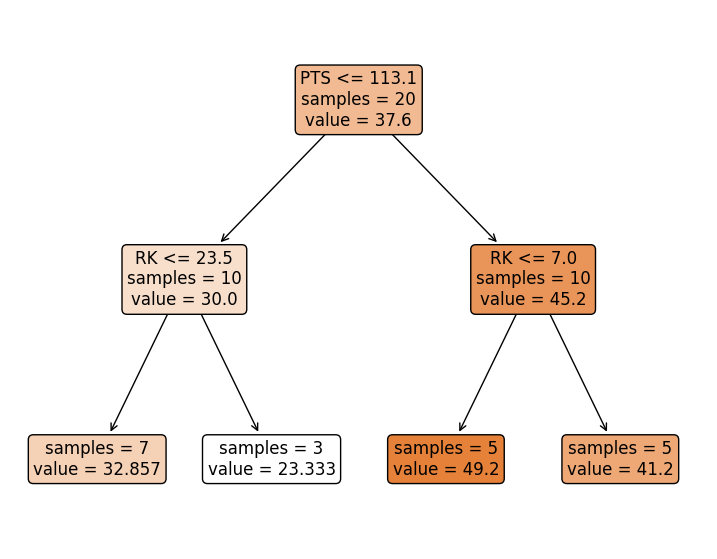

In [145]:
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(9,7))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [182]:
y_test_float = [float(i) for i in y_test]
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)




print('OSR2:', OSR2(dtr, X_test, np.array(y_test_float), np.array(list(y_train)).astype(float)))

[41.2        23.33333333 32.85714286 23.33333333 49.2        32.85714286
 23.33333333 49.2        32.85714286]
OSR2: 0.9130534731887142


# DTR on 2021

In [268]:
#2021
dtr2 = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.02,
                            random_state = 88)
dtr2 = dtr2.fit(X2_train, y2_train)

Node count = 7


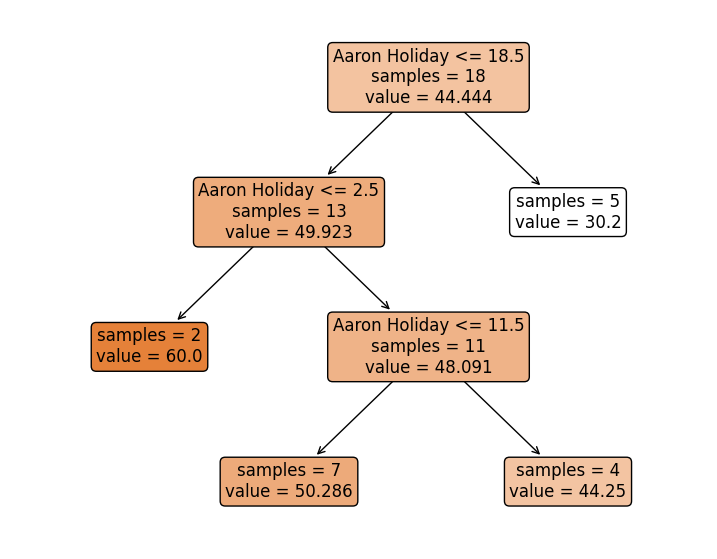

In [269]:
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(9,7))
plot_tree(dtr2, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [270]:
y_test_float2 = [float(i) for i in y2_test]
print('OSR2:', OSR2(dtr2, X2_test, np.array(y_test_float2), np.array(list(y2_train)).astype(float)))

[30.2        50.28571429 30.2        30.2        44.25       50.28571429
 30.2        30.2        30.2       ]
OSR2: 0.8688577540456656


In [ ]:
team_2021_player_2021.dropna(axis = 'columns', inplace=True)
team_2021_player_2021= pd.get_dummies(team_2021_player_2021, columns=['Team'])
team_2021_player_2021['won']= team_2021_player_2021['Overall'].str.extract("([\d]{2})-").rename(columns={0: 'col'})['col']
team_2021_player_2021.drop(['Pre','full_x', 'Overall', 'full_y','abbr','abbreviation','Unamed: 19','Unamed: 24', 'Home', 'Road', 'E', 'W', 'A', 'C', 'SE', 'NW','P','SW','PRE', 'Post','≤3','≥10','Oct', 'Nov', 'Dec', 'Jan', 'Feb','Mar', 'Apr'] , inplace= True, axis=1, errors='ignore')

y2 = team_2021_player_2021['won'] # make a won column 
X2 = team_2021_player_2021.drop(['won'], axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    test_size=0.3,
                                                    random_state=88)
X2_train.shape, X2_test.shape

In [345]:
team_2022_player_2022.drop(['Short Form', 'full_x','abbr', 'abbreviation', 'full_y', 'Unnamed: 19', 'Unnamed: 24'] , inplace= True, axis=1, errors = 'ignore')
team_2022_player_2022= pd.get_dummies(team_2022_player_2022, columns=['TEAM'])
y = team_2022_player_2022['won'] # make a won column 
X = team_2022_player_2022.drop(['won'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=88)

# Linear Regression on 2021

In [415]:
from sklearn.linear_model import LinearRegression

In [1]:
ols_y_values2

NameError: name 'ols_y_values2' is not defined

In [457]:
ols_x_values2 = team_2021_player_2021.drop(['won'], axis='columns', inplace=False)
ols_y_values2 = team_2021_player_2021['won']

train_ols_X2, test_ols_X2, train_ols_y2, test_ols_y2 = train_test_split(ols_x_values2, ols_y_values2, test_size=0.3)

ols2 = LinearRegression()

ols2.fit(train_ols_X2, train_ols_y2)

linear_y_train_prediction2 = ols2.predict(train_ols_X2)

linear_y_prediction2 = ols2.predict(test_ols_X2)

osr2_linear2 = r2_score(np.array(test_ols_y2.values), linear_y_prediction2)


r2_linear2 = r2_score(np.array(train_ols_y2), linear_y_train_prediction2)

print("The R2 is {} and OSR2 is {}".format(r2_linear2, osr2_linear2))

The R2 is 1.0 and OSR2 is 0.9408741249470114


# Linear Regression on 2022

In [449]:


ols_x_values = team_2022_player_2022.drop(['won'], axis='columns', inplace=False)
ols_y_values = team_2022_player_2022['won']

train_ols_X, test_ols_X, train_ols_y, test_ols_y = train_test_split(ols_x_values, ols_y_values, test_size=0.3)

ols = LinearRegression()

ols.fit(train_ols_X, train_ols_y)

linear_y_train_prediction = ols.predict(train_ols_X)

linear_y_prediction = ols.predict(test_ols_X)

osr2_linear = r2_score(np.array(test_ols_y.values), linear_y_prediction)


r2_linear = r2_score(np.array(train_ols_y), linear_y_train_prediction)

print("The R2 is {} and OSR2 is {}".format(r2_linear, osr2_linear))




The R2 is 1.0 and OSR2 is 0.8827727004233944


# Ridge on 2021

In [454]:
ols_x_values = team_2021_player_2021.drop(['won'], axis='columns', inplace=False)
ols_y_values = team_2021_player_2021['won']

train_ols_X, test_ols_X, train_ols_y, test_ols_y = train_test_split(ols_x_values, ols_y_values, test_size=0.3)
parameters = {'alpha': np.linspace(0, 1, 100)}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

Ridge_reg.fit(train_ols_X, train_ols_y)


best_model = Ridge_reg.best_estimator_
best_model.fit(train_ols_X,train_ols_y)
ols_y_predicted = best_model.predict(test_ols_X)

r2 = r2_score(np.array(train_ols_y.values), Ridge_reg.predict(train_ols_X))

osr2 = r2_score(np.array(test_ols_y.values), ols_y_predicted)

print("The R2 is {} and OSR2 is {}".format(r2, osr2))


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
The R

# Ridge on 2022

In [455]:
ols_x_values = team_2022_player_2022.drop(['won'], axis='columns', inplace=False)
ols_y_values = team_2022_player_2022['won']

train_ols_X, test_ols_X, train_ols_y, test_ols_y = train_test_split(ols_x_values, ols_y_values, test_size=0.3)
parameters = {'alpha': np.linspace(0, 1, 100)}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

Ridge_reg.fit(train_ols_X, train_ols_y)


best_model = Ridge_reg.best_estimator_
best_model.fit(train_ols_X,train_ols_y)
ols_y_predicted = best_model.predict(test_ols_X)

r2 = r2_score(np.array(train_ols_y.values), Ridge_reg.predict(train_ols_X))

osr2 = r2_score(np.array(test_ols_y.values), ols_y_predicted)

print("The R2 is {} and OSR2 is {}".format(r2, osr2))


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
The R

# Lasso on 2021

In [452]:
ols_x_values = team_2021_player_2021.drop(['won'], axis='columns', inplace=False)
ols_y_values = team_2021_player_2021['won']


train_ols_X, test_ols_X, train_ols_y, test_ols_y = train_test_split(ols_x_values, ols_y_values, test_size=0.3)
clf = Lasso(alpha=0.1)
clf.fit(train_ols_X, train_ols_y)


lasso_y_prediction_test = clf.predict(test_ols_X)

r2 = r2_score(np.array(train_ols_y.values), clf.predict(train_ols_X))

osr2 = r2_score(np.array(test_ols_y.values), lasso_y_prediction_test)

print("The R2 is {} and OSR2 is {}".format(r2, osr2))


The R2 is 0.9929178196767303 and OSR2 is 0.9328283327287276


# lasso on 2022

In [453]:
ols_x_values = team_2022_player_2022.drop(['won'], axis='columns', inplace=False)
ols_y_values = team_2022_player_2022['won']


train_ols_X, test_ols_X, train_ols_y, test_ols_y = train_test_split(ols_x_values, ols_y_values, test_size=0.3)
clf = Lasso(alpha=0.1)
clf.fit(train_ols_X, train_ols_y)


lasso_y_prediction_test = clf.predict(test_ols_X)

r2 = r2_score(np.array(train_ols_y.values), clf.predict(train_ols_X))

osr2 = r2_score(np.array(test_ols_y.values), lasso_y_prediction_test)

print("The R2 is {} and OSR2 is {}".format(r2, osr2))


The R2 is 0.9949738768913737 and OSR2 is 0.9203856028846586


In [ ]:

print('OSR2:', OSR2(dtr, X_test, np.array(y_test_float), np.array(list(y_train)).astype(float)))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac37a157-04c8-43db-a4ac-4fd05f6b1f97' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>